In [1]:
IRdisplay::display_html("
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
body.rise-enabled div.inner_cell>div.input_area {
    font-size: 150%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 150%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>
")
options(repr.plot.width=6, repr.plot.height=4)

In [41]:
library(tidyverse)
library(lubridate)
library(forcats)
library(nycflights13)

# Lecture 14: Factors & dates

## Factors
Recall that a random variable is *categorical* if it takes on one of a (small) number of discrete values. 

In [3]:
birth_months = c("Jan", "Feb", "Sep", "Sep", "Dec", "Jan", "Jul", "Aug")  # categorical variable

The *possible* values of a categorical variable are called the *levels*. The levels of `birth_months` are `Jan`, `Feb`, ..., `Dec`. The *actual* values of `birth_months` are just called the values.

*Factors* are the traditional way to represent categorical data in R. To create a factor, we must specify the levels and the values:

In [4]:
month.abb

 [1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

In [5]:
print(birth_months)
str(factor(birth_months, levels=month.abb))

[1] "Jan" "Feb" "Sep" "Sep" "Dec" "Jan" "Jul" "Aug"
 Factor w/ 12 levels "Jan","Feb","Mar",..: 1 2 9 9 12 1 7 8


If you don't specify the levels, R will infer them based on all the observed values of the variable:

In [6]:
factor(birth_months) %>% str

 Factor w/ 6 levels "Aug","Dec","Feb",..: 4 3 6 6 2 4 5 1


It's best to be explicit about the factor levels. This way, if you there are typos or data entry errors, you will catch them more easily:

In [7]:
bad = c("Jan", "Feb", "Sep", "Ser", "Dec", "Jan", "Jul", "Aug")
#                               ^ note typo
# factor(bad)
factor(bad, levels=month.abb)

[1] Jan  Feb  Sep  <NA> Dec  Jan  Jul  Aug 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

### The `forcats` package
`tidyverse` contains a package that has some tools for working with factors. Sometimes it is not automatically loaded by the `tidyverse` metapackage, in which case you must load it manually:

In [8]:
library(forcats)

`forcats` commands are prefixed by `fct_` (compare `stringr`).

For the rest of the examples, we'll use a data set included in `forcats` called `gss_cat`. This is a standard data set from the General Social Survey which contains a lot of categorical variables:

In [9]:
print(forcats::gss_cat)

# A tibble: 21,483 x 9
    year marital     age race  rincome    partyid     relig     denom    tvhours
   <int> <fct>     <int> <fct> <fct>      <fct>       <fct>     <fct>      <int>
 1  2000 Never ma…    26 White $8000 to … Ind,near r… Protesta… Souther…      12
 2  2000 Divorced     48 White $8000 to … Not str re… Protesta… Baptist…      NA
 3  2000 Widowed      67 White Not appli… Independent Protesta… No deno…       2
 4  2000 Never ma…    39 White Not appli… Ind,near r… Orthodox… Not app…       4
 5  2000 Divorced     25 White Not appli… Not str de… None      Not app…       1
 6  2000 Married      25 White $20000 - … Strong dem… Protesta… Souther…      NA
 7  2000 Never ma…    36 White $25000 or… Not str re… Christian Not app…       3
 8  2000 Divorced     44 White $7000 to … Ind,near d… Protesta… Luthera…      NA
 9  2000 Married      44 White $25000 or… Not str de… Protesta… Other          0
10  2000 Married      47 White $25000 or… Strong rep… Protesta… Souther…       3
# … w

### Order
One advantage of factors is that they can be ordered. This enables them to sort and plot in the way you would expect. Compare:

In [10]:
sort(birth_months)
sort(birth_months_fac)

[1] "Aug" "Dec" "Feb" "Jan" "Jan" "Jul" "Sep" "Sep"

ERROR: Error in sort(birth_months_fac): object 'birth_months_fac' not found


If you specify the factor levels using the `levels=` option, then that will specify the default order. If you do *not* specify the levels, then they will be sorted alphabetically by default:

In [11]:
levels(birth_months_fac)
levels(factor(birth_months))

ERROR: Error in levels(birth_months_fac): object 'birth_months_fac' not found


There are several options for reordering factor levels. The first is `fct_reorder` which we have already seen. It reorders a factor based on the values of another continuous variable.

In [12]:
relig_summary = gss_cat %>%
  group_by(relig) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  ) %>% print 

# A tibble: 15 x 4
   relig                     age tvhours     n
   <fct>                   <dbl>   <dbl> <int>
 1 No answer                49.5    2.72    93
 2 Don't know               35.9    4.62    15
 3 Inter-nondenominational  40.0    2.87   109
 4 Native american          38.9    3.46    23
 5 Christian                40.1    2.79   689
 6 Orthodox-christian       50.4    2.42    95
 7 Moslem/islam             37.6    2.44   104
 8 Other eastern            45.9    1.67    32
 9 Hinduism                 37.7    1.89    71
10 Buddhism                 44.7    2.38   147
11 Other                    41.0    2.73   224
12 None                     41.2    2.71  3523
13 Jewish                   52.4    2.52   388
14 Catholic                 46.9    2.96  5124
15 Protestant               49.9    3.15 10846


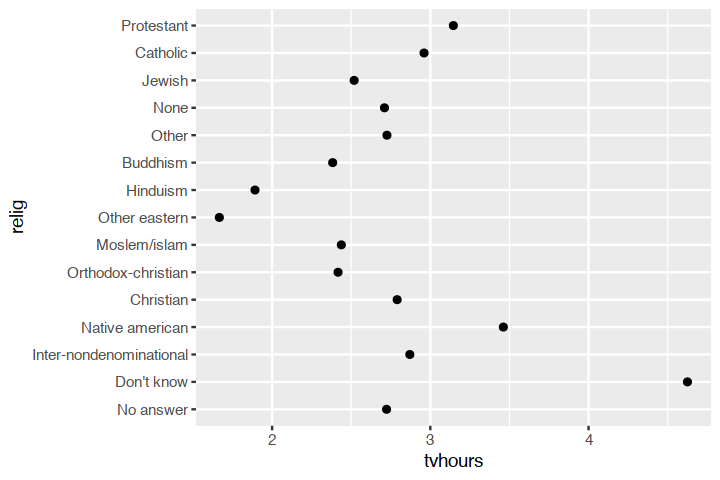

In [13]:
ggplot(relig_summary) + geom_point(aes(tvhours, relig))

In [14]:
head(relig_summary$relig)
head(fct_reorder(relig_summary$relig, relig_summary$tvhours))
# ggplot(relig_summary) + geom_point(aes(tvhours, fct_reorder(relig, tvhours)))

[1] No answer               Don't know              Inter-nondenominational
[4] Native american         Christian               Orthodox-christian     
16 Levels: No answer Don't know Inter-nondenominational ... Not applicable

[1] No answer               Don't know              Inter-nondenominational
[4] Native american         Christian               Orthodox-christian     
16 Levels: Other eastern Hinduism Buddhism Orthodox-christian ... Not applicable

Let's try visualizing income by age:

In [15]:
rincome_summary = gss_cat %>%
  group_by(rincome) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  ) %>% print

# A tibble: 16 x 4
   rincome          age tvhours     n
   <fct>          <dbl>   <dbl> <int>
 1 No answer       45.5    2.90   183
 2 Don't know      45.6    3.41   267
 3 Refused         47.6    2.48   975
 4 $25000 or more  44.2    2.23  7363
 5 $20000 - 24999  41.5    2.78  1283
 6 $15000 - 19999  40.0    2.91  1048
 7 $10000 - 14999  41.1    3.02  1168
 8 $8000 to 9999   41.1    3.15   340
 9 $7000 to 7999   38.2    2.65   188
10 $6000 to 6999   40.3    3.17   215
11 $5000 to 5999   37.8    3.16   227
12 $4000 to 4999   38.9    3.15   226
13 $3000 to 3999   37.8    3.31   276
14 $1000 to 2999   34.5    3.00   395
15 Lt $1000        40.5    3.36   286
16 Not applicable  56.1    3.79  7043


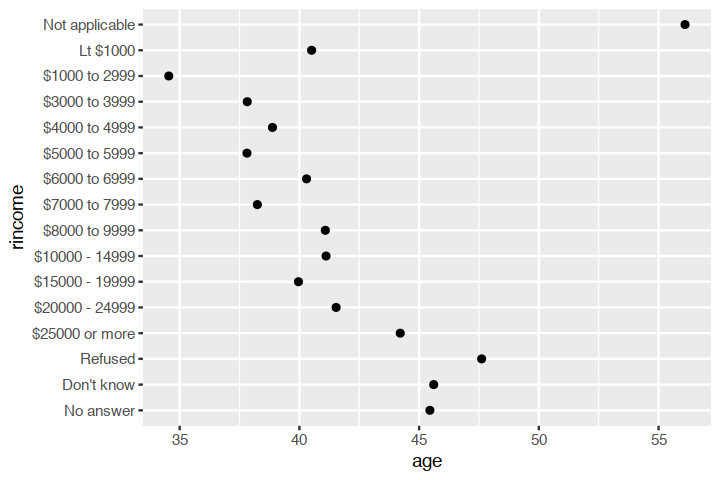

In [16]:
ggplot(rincome_summary) + geom_point(aes(age, rincome))

The plot may look visually appealing but the $y$-axis is totally jumbled! This shows that we only use `fct_reorder` in cases where there is not already a natural order. 

Nevertheless, there are a few categories that can be sensibly broken out: `No answer`, `Not applicable`, `Don't Know` and `Refused`. The command `fct_relevel(f, lvls)` takes a factor `f` and returns a new factor which has the vector `lvls` of factor levels placed at the front:

In [17]:
rincome_summary$rincome
fct_relevel(rincome_summary$rincome, 'Not applicable')

 [1] No answer      Don't know     Refused        $25000 or more $20000 - 24999
 [6] $15000 - 19999 $10000 - 14999 $8000 to 9999  $7000 to 7999  $6000 to 6999 
[11] $5000 to 5999  $4000 to 4999  $3000 to 3999  $1000 to 2999  Lt $1000      
[16] Not applicable
16 Levels: No answer Don't know Refused $25000 or more ... Not applicable

 [1] No answer      Don't know     Refused        $25000 or more $20000 - 24999
 [6] $15000 - 19999 $10000 - 14999 $8000 to 9999  $7000 to 7999  $6000 to 6999 
[11] $5000 to 5999  $4000 to 4999  $3000 to 3999  $1000 to 2999  Lt $1000      
[16] Not applicable
16 Levels: Not applicable No answer Don't know Refused ... Lt $1000

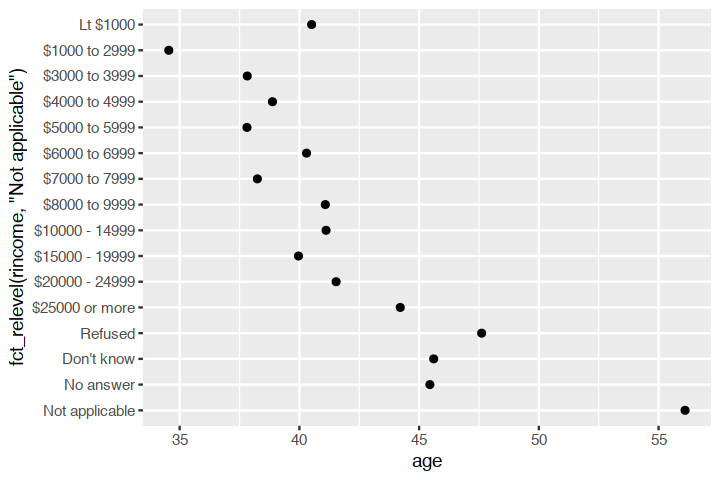

In [18]:
ggplot(rincome_summary) + geom_point(aes(age, fct_relevel(rincome, 'Not applicable')))

Finally we have a couple of other useful commands. `fct_infreq(f)` will reorder the levels in `f` increasing frequency. This is useful with `geom_bar`:

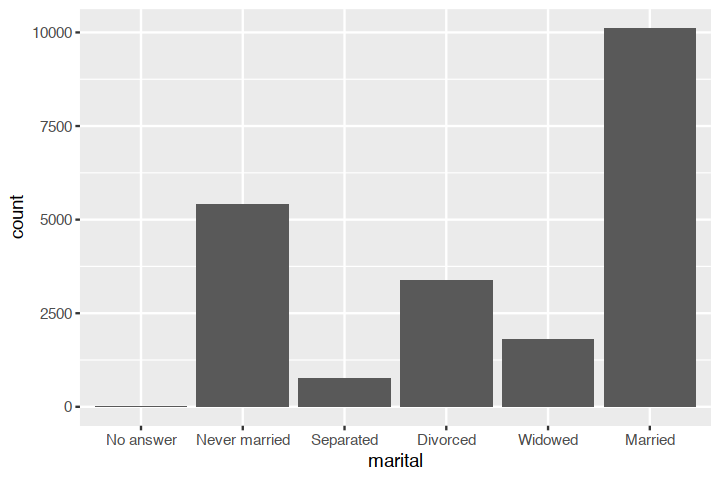

In [19]:
ggplot(gss_cat, aes(marital)) + geom_bar()

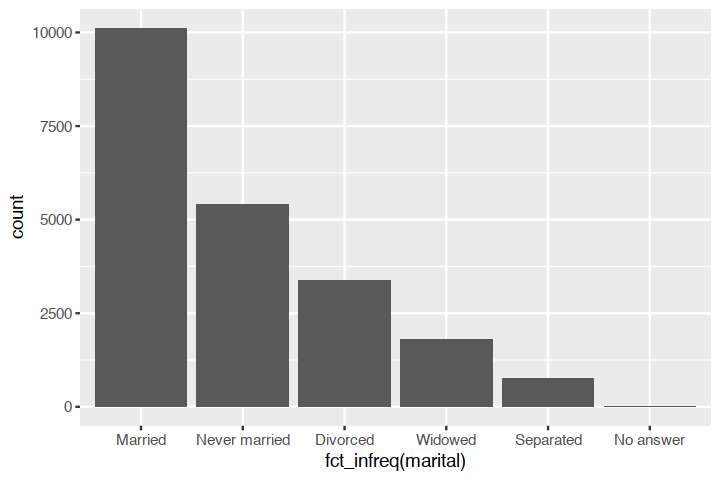

In [20]:
ggplot(gss_cat, aes(fct_infreq(marital))) + geom_bar()

`fct_rev` will reverse the order of a factor:

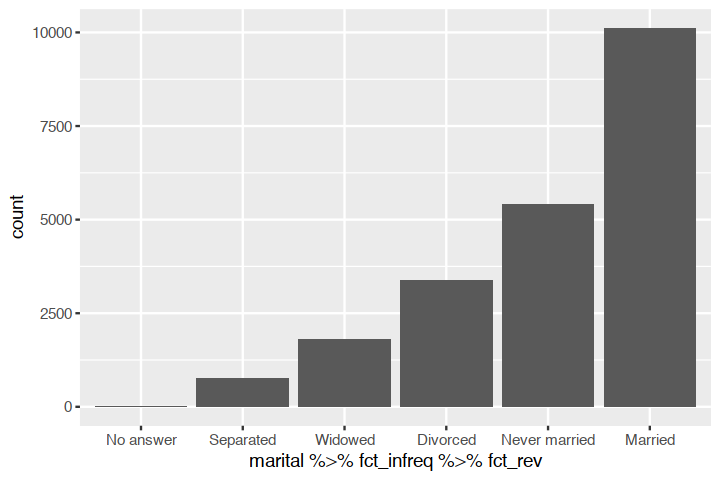

In [21]:
ggplot(gss_cat, aes(marital %>% fct_infreq %>% fct_rev)) + geom_bar()

### Altering levels
In many cases it is necessary to change the *values* of a factor, especially when generating plots and tables for publications. 

In [22]:
count(gss_cat, partyid)

   partyid            n   
1  No answer           154
2  Don't know            1
3  Other party         393
4  Strong republican  2314
5  Not str republican 3032
6  Ind,near rep       1791
7  Independent        4119
8  Ind,near dem       2499
9  Not str democrat   3690
10 Strong democrat    3490

The `fct_recode` command makes this easy. This command takes a factor and a set of `new_level=old_level` options:

In [23]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "Strong republican",
    "Republican, weak"      = "Not str republican",
    "Independent, near republican" = "Ind,near rep",
    "Independent, near democrat" = "Ind,near dem",
    "Democrat, weak"        = "Not str democrat",
    "Democrat, strong"      = "Strong democrat"
  )) %>%
  mutate(partyid_int = as.integer(partyid)) %>% select(partyid, partyid_int) %>% print
  # count(partyid)

# A tibble: 21,483 x 2
   partyid                      partyid_int
   <fct>                              <int>
 1 Independent, near republican           6
 2 Republican, weak                       5
 3 Independent                            7
 4 Independent, near republican           6
 5 Democrat, weak                         9
 6 Democrat, strong                      10
 7 Republican, weak                       5
 8 Independent, near democrat             8
 9 Democrat, weak                         9
10 Republican, strong                     4
# … with 21,473 more rows


A useful feature of `fct_recode` is for combining multiple factors into one:

In [24]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican"            = "Strong republican",
    "Republican"            = "Not str republican",
    "Independent"           = "Ind,near rep",
    "Independent"           = "Ind,near dem",
    "Democrat"              = "Not str democrat",
    "Democrat"              = "Strong democrat",
    "Other"                 = "No answer",
    "Other"                 = "Don't know",
    "Other"                 = "Other party"
  )) %>%
  count(partyid)

  partyid     n   
1 Other        548
2 Republican  5346
3 Independent 8409
4 Democrat    7180

If there are many levels this gets repetitious, so we have an additional command called `fct_collapse` which is specifically designed to handle this case:

In [25]:
gss_cat %>%
  mutate(partyid = fct_collapse(partyid,
    Other = c("No answer", "Don't know", "Other party"),
    Republican = c("Strong republican", "Not str republican"),
    Independent = c("Ind,near rep", "Independent", "Ind,near dem"),
    Democrat = c("Not str democrat", "Strong democrat")
  )) %>%
  count(partyid)

  partyid     n   
1 Other        548
2 Republican  5346
3 Independent 8409
4 Democrat    7180

### Exercise
What is the relationship between party affiliation and:

- Age
- Hours of TV watched per week
- Income

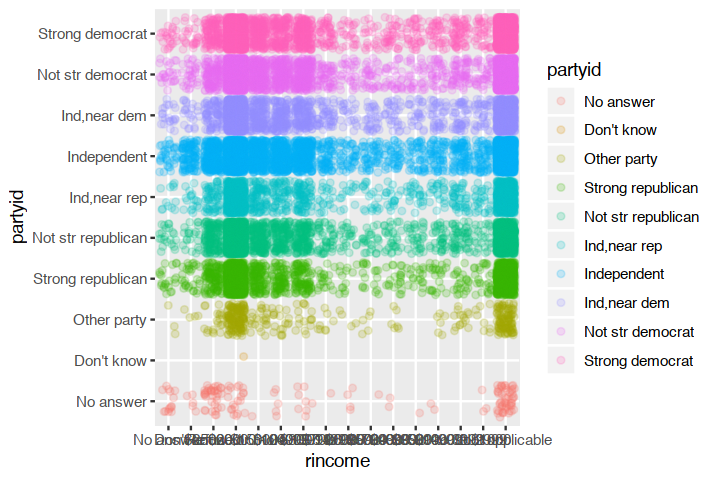

In [26]:
gss_cat %>%
 ggplot + geom_jitter(aes(x=rincome, y=partyid, color=partyid), 
                      alpha=.2) 

### Exercise
A *millennial* is someone who was born between 1982 and 2000 (inclusive, say). A *baby boomer* is someone who was born from 1946-1964. Compared to baby boomers, are millennials:
- How many boomers & millennials are there?
- More religious?
- More liberal?
- More avid TV watchers?

In [27]:
tbl <- gss_cat %>% mutate(birth_year = year - age,
                   age_category = cut(birth_year,
                   breaks = c(0, 1946, 1964, 1982, 2000),
                   labels = c("neither", "boomer", "neither",
                              "millennial"))) %>% 
    mutate(no_religion = relig == "None") %>%
    filter(age_category %in% c("boomer", "millennial"))


lm(tvhours ~ age_category, data = tbl) %>% summary

# table(tbl$age_category, tbl$no_religion)

# prop.test(x = c(1077, 525), n = c(6343 + 1077, 1272 + 525))




Call:
lm(formula = tvhours ~ age_category, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0008 -1.7991 -0.7991  0.9992 21.2009 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.00078    0.04370  68.674   <2e-16 ***
age_categorymillennial -0.20168    0.09257  -2.179   0.0294 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.713 on 4957 degrees of freedom
  (4258 observations deleted due to missingness)
Multiple R-squared:  0.0009567,	Adjusted R-squared:  0.0007552 
F-statistic: 4.747 on 1 and 4957 DF,  p-value: 0.02939


In [28]:
 <- 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:2: unexpected assignment
1:  <-
     ^


## Dates
Most of us have a pretty firm grasp on dates. But they can be more complicated than you might think. Consider these three questions from the book:
* Does every year have 365 days?
* Does every day have 24 hours?
* Does every minute have 60 seconds?

The answer to all three is "no".

As before, we'll rely on the `lubridate` package to work with dates:

In [72]:
library(lubridate)

There are three different date classes in R:

* A date, printed in tibble as `<date>`, represents a full day on the calendar.
* A time within a day, printed as `<time>`, represents a specific time within an (unspecified) day.
* A date-time is a date plus a time (tibble: `<dttm>`). A date-time uniquely identifies an instant in time (up to a given precision, usually 1 second.)

We've already seen examples of date-times in the `flights` tibble:

In [73]:
select(flights, time_hour) %>% print

# A tibble: 336,776 x 1
   time_hour          
   <dttm>             
 1 2013-01-01 05:00:00
 2 2013-01-01 05:00:00
 3 2013-01-01 05:00:00
 4 2013-01-01 05:00:00
 5 2013-01-01 06:00:00
 6 2013-01-01 05:00:00
 7 2013-01-01 06:00:00
 8 2013-01-01 06:00:00
 9 2013-01-01 06:00:00
10 2013-01-01 06:00:00
# … with 336,766 more rows


You should tend to favor working with dates over date-times if possible. The latter are more complicated because of the need to handle time zones.



We can get the current date and date-time using the `today()` and `now()` commands:

In [74]:
today()

[1] "2019-10-29"

In [75]:
now()

[1] "2019-10-29 10:07:01 EDT"

### Converting strings to dates and times
Frequently you will be encounter date and/or time data stored as text. You will need to convert these data into the native R date classes in order to use date functions on them. The `mdy/ymd/dmy` functions accomplish this.

In [83]:
ymd("2017 01 31")

[1] "2017-01-31"

In [84]:
mdy("1 31 2017")

dmy("31 1 2017")

[1] "2017-01-31"

[1] "2017-01-31"

### Other languages
You might find yourself needing to parse dates in other languages. This will fail if the dates are in a language which is different from your system's language:

In [85]:
dmy("31 août 2017")

Warning message:
“All formats failed to parse. No formats found.”

[1] NA

Fix this by specifying the *locale* option:

In [86]:
dmy("31 août 2017", locale = "fr_FR")

[1] "2017-08-31"

In [34]:
dmy("31-Jan-2017")

[1] "2017-01-31"

#### Date-time parsers
There are also equivalent functions for parsing date-times:

In [88]:
ymd_hms("2017-01-31 20:11:59")

[1] "2017-01-31 20:11:59 UTC"

In [89]:
mdy_hm("01/31/2017 08:01")

[1] "2017-01-31 08:01:00 UTC"

Sometimes you can get away with calling `as_datetime()`:

In [91]:
as_datetime("2017-01-31 20:11:59")
as_datetime("01/31/2017 08:01")

[1] "2017-01-31 20:11:59 UTC"

Warning message:
“All formats failed to parse. No formats found.”

[1] NA

### Making a date-time from components
We saw in the `flights` table that date information can be spread across multiple columns. The `make_date` and `make_datetime` functions can make dates from these:

In [95]:
flights %>% select(year, month, day, dep_time) %>% print

# A tibble: 336,776 x 4
    year month   day dep_time
   <int> <int> <int>    <int>
 1  2013     1     1      517
 2  2013     1     1      533
 3  2013     1     1      542
 4  2013     1     1      544
 5  2013     1     1      554
 6  2013     1     1      554
 7  2013     1     1      555
 8  2013     1     1      557
 9  2013     1     1      557
10  2013     1     1      558
# … with 336,766 more rows


#### Example
The `flights` table has scheduled as well as actual arrival and departure times. Let's create a date-time variable from the actual departure time:

In [98]:
make_datetime_100 = function(year, month, day, time) {
  make_datetime(year, month, day, time %/% 100, time %% 100)
}

flights_dt = flights %>% 
  filter(!is.na(dep_time), !is.na(arr_time)) %>% 
  mutate(
    dep_time = make_datetime_100(year, month, day, dep_time),
    arr_time = make_datetime_100(year, month, day, arr_time),
    sched_dep_time = make_datetime_100(year, month, day, sched_dep_time),
    sched_arr_time = make_datetime_100(year, month, day, sched_arr_time)
  ) %>% 
  select(origin, dest, ends_with("delay"), ends_with("time"))  %>% print

# A tibble: 328,063 x 9
   origin dest  dep_delay arr_delay dep_time            sched_dep_time     
   <chr>  <chr>     <dbl>     <dbl> <dttm>              <dttm>             
 1 EWR    IAH           2        11 2013-01-01 05:17:00 2013-01-01 05:15:00
 2 LGA    IAH           4        20 2013-01-01 05:33:00 2013-01-01 05:29:00
 3 JFK    MIA           2        33 2013-01-01 05:42:00 2013-01-01 05:40:00
 4 JFK    BQN          -1       -18 2013-01-01 05:44:00 2013-01-01 05:45:00
 5 LGA    ATL          -6       -25 2013-01-01 05:54:00 2013-01-01 06:00:00
 6 EWR    ORD          -4        12 2013-01-01 05:54:00 2013-01-01 05:58:00
 7 EWR    FLL          -5        19 2013-01-01 05:55:00 2013-01-01 06:00:00
 8 LGA    IAD          -3       -14 2013-01-01 05:57:00 2013-01-01 06:00:00
 9 JFK    MCO          -3        -8 2013-01-01 05:57:00 2013-01-01 06:00:00
10 LGA    ORD          -2         8 2013-01-01 05:58:00 2013-01-01 06:00:00
# … with 328,053 more rows, and 3 more variables: arr_time <dttm

Now we can use built in R command to query and plot these data based on actual departure time:

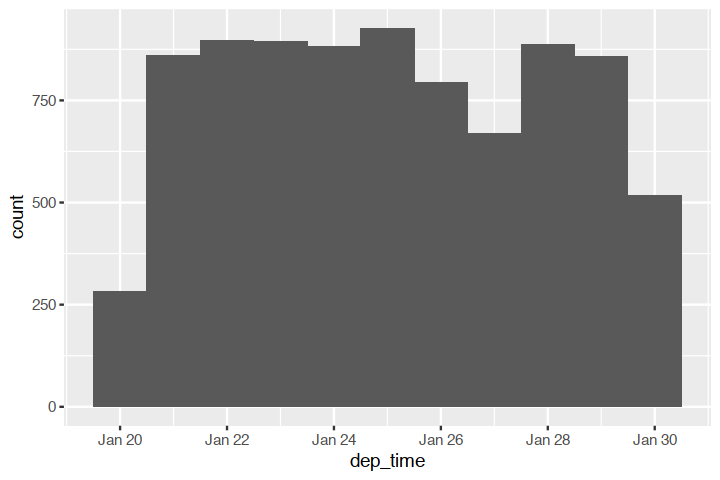

In [112]:
flights_dt %>% 
  filter(dep_time < ymd(20130130), dep_time >= ymd(20130120)) %>% 
  ggplot(aes(x=dep_time)) + 
  geom_histogram(binwidth = 24 * 60 * 60)

Notice that this command and resulting graph looks much nicer than if we did not use the date classes:
* The filter on `dep_time` looks more natural than `filter(day<2, month==1, year==2013)`.
* We can easily express the bin-width of 600 seconds in `geom_freqpoly(binwidth = 600)`. When you use date-times in a numeric context (like in a histogram), 1 means 1 second; for dates, 1 means 1 day.
* The plot x axis has nice readable labels.

### The epoch
UNIX systems sometimes represent time as "the number of seconds which have elapsed since 1-1-1970." This date is known as "the epoch". So you may occasionally come across date-times that look like:

In [115]:
now() %>% as.integer() 

[1] 1572358737

To convert these to date format you can use `as_datetime`:

In [120]:
as_datetime(3600 * 24)

[1] "1970-01-02 UTC"

### Challenge problem
Alice was born on August 1, 1999. How many seconds old is Alice? (To the nearest million, say).

In [127]:
a <- now() %>% as.integer
b <- mdy_hms("August 1, 1999 00:00:00") %>% as.integer

a - b

[1] 638893343

### Date-time components
The functions `year()`, `month()`, `mday()` (day of the month), `yday()` (day of the year), `wday()` (day of the week), `hour()`, `minute()`, and `second()` can extract components from dates and times:

In [149]:
mdy_hms(c("March 12, 2018 12:00:00")) 

[1] "2018-03-12 12:00:00 UTC"

By extracting the minute component of scheduled departure time, we uncover a surprising pattern:

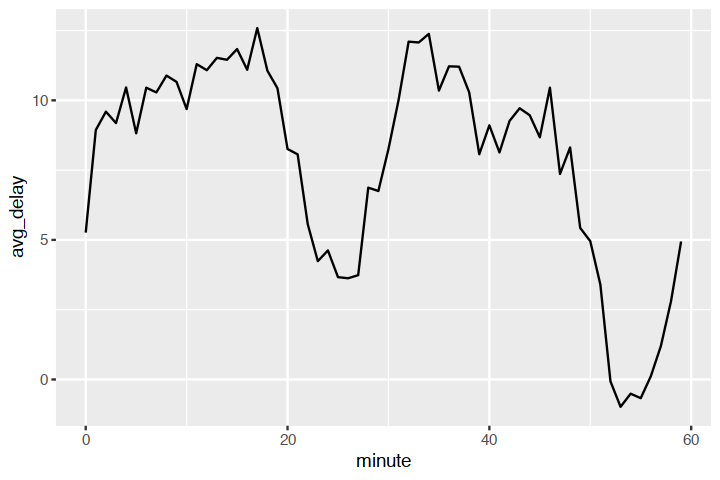

In [49]:
flights_dt %>% 
  mutate(minute = minute(dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n()) %>% 
  ggplot(aes(minute, avg_delay)) +
    geom_line()

On the other hand, when grouped by scheduled departure time the delays seem to be random:

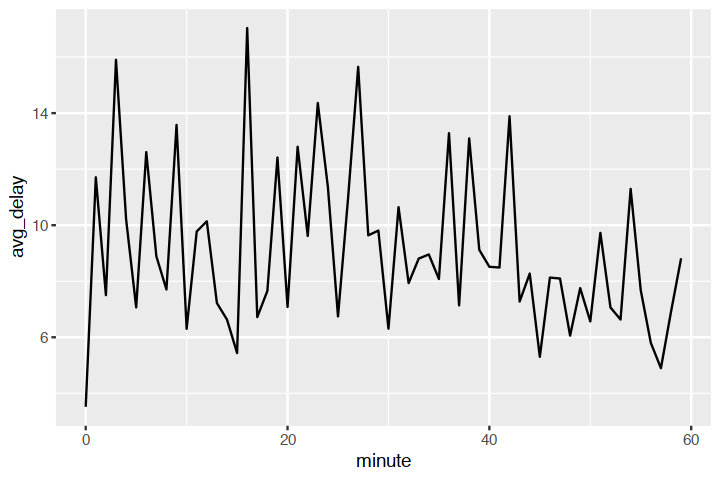

In [50]:
sched_dep <- flights_dt %>% 
  mutate(minute = minute(sched_dep_time)) %>% 
  group_by(minute) %>% 
  summarise(
    avg_delay = mean(arr_delay, na.rm = TRUE),
    n = n())

ggplot(sched_dep, aes(minute, avg_delay)) +
  geom_line()

As explained by the book, there is a bias in scheduled departure times towards nice round numbers:

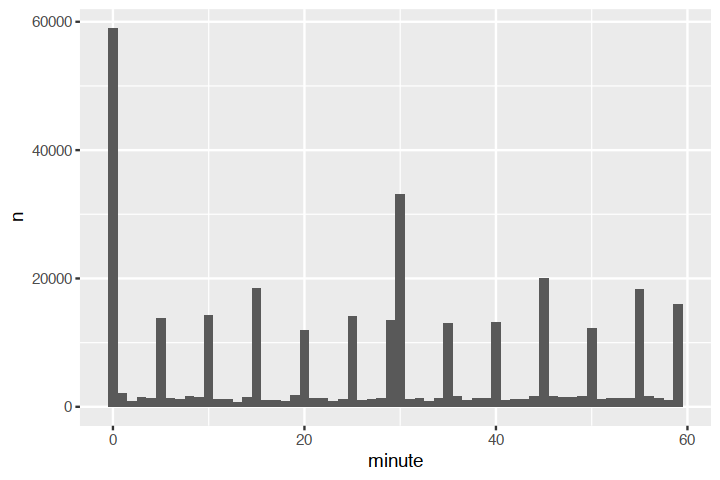

In [51]:
ggplot(sched_dep, aes(minute, n)) + geom_col()

#### As accessors
The component functions also work as accessors, meaning they can be used on the left-hand side of an assignment:

In [52]:
(d = today())
mday(d) = 24
d

[1] "2019-10-29"

[1] "2019-10-24"

To return a new (date)time rather than modifying in place, you can use the `update` command:

In [53]:
update(today(), year=2020)

[1] "2020-10-29"

### Time spans
Time spans are the difference between two time points. These are represented in R by the `difftime` class:

In [54]:
(d = today() - update(today(), year=2010))
class(d)

Time difference of 3287 days

[1] "difftime"

Because it is usually simpler to reason about time differences in terms of a single number, `lubridate` also provides a `duration` class which is stored in terms of seconds:

In [55]:
as.duration(1234)

[1] "1234s (~20.57 minutes)"

In [56]:
dseconds(10)

[1] "10s"

In [57]:
dweeks(3)

[1] "1814400s (~3 weeks)"

Arithmetic with durations works as you would expect:

In [58]:
2 * dyears(1)

[1] "63072000s (~2 years)"

In [59]:
dyears(1) + dweeks(12) + dhours(15)

[1] "38847600s (~1.23 years)"

You have to be careful when adding durations and dates. What is 1 day after this Saturday at 1pm?

In [158]:
next_saturday = mdy_hm("Nov. 2, 2019 13:00PM", tz="America/Detroit")
next_saturday + ddays(1)

[1] "2019-11-03 12:00:00 EST"

To prevent this sort of thing from happening, `lubridate` also offers objects called "periods":

In [61]:
days(1)
class(days(1))

[1] "1d 0H 0M 0S"

[1] "Period"
attr(,"package")
[1] "lubridate"

Similarly, periouds have the expected behaviour if you add one year to a leap year:

In [159]:
ymd("2016-01-01") + dyears(1)

[1] "2016-12-31"

In [66]:
ymd("2016-01-01") + years(1)

[1] "2017-01-01"

### Exercise
Jack is 20,000 days old today. What is Jack's birthday?

In [67]:
today() - ddays(20000)

[1] "1965-01-25"

#### Example
Earlier in the semester we saw how some flights seem to have arrived before they departed:

In [68]:
filter(flights, arr_time < dep_time) %>% head %>% print

# A tibble: 6 x 19
   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1  2013     1     1     1929           1920         9        3              7
2  2013     1     1     1939           1840        59       29           2151
3  2013     1     1     2058           2100        -2        8           2359
4  2013     1     1     2102           2108        -6      146            158
5  2013     1     1     2108           2057        11       25             39
6  2013     1     1     2120           2130       -10       16             18
# … with 11 more variables: arr_delay <dbl>, carrier <chr>, flight <int>,
#   tailnum <chr>, origin <chr>, dest <chr>, air_time <dbl>, distance <dbl>,
#   hour <dbl>, minute <dbl>, time_hour <dttm>


This is because these are overnight flights. To fix this, we can now simply add one day to `arr_time`:

In [69]:
flights_dt = flights_dt %>% 
  mutate(
    overnight = arr_time < dep_time,
    arr_time = arr_time + days(overnight * 1),
    sched_arr_time = sched_arr_time + days(overnight * 1)
  ) %>% print

# A tibble: 328,063 x 10
   origin dest  dep_delay arr_delay dep_time            sched_dep_time     
   <chr>  <chr>     <dbl>     <dbl> <dttm>              <dttm>             
 1 EWR    IAH           2        11 2013-01-01 05:17:00 2013-01-01 05:15:00
 2 LGA    IAH           4        20 2013-01-01 05:33:00 2013-01-01 05:29:00
 3 JFK    MIA           2        33 2013-01-01 05:42:00 2013-01-01 05:40:00
 4 JFK    BQN          -1       -18 2013-01-01 05:44:00 2013-01-01 05:45:00
 5 LGA    ATL          -6       -25 2013-01-01 05:54:00 2013-01-01 06:00:00
 6 EWR    ORD          -4        12 2013-01-01 05:54:00 2013-01-01 05:58:00
 7 EWR    FLL          -5        19 2013-01-01 05:55:00 2013-01-01 06:00:00
 8 LGA    IAD          -3       -14 2013-01-01 05:57:00 2013-01-01 06:00:00
 9 JFK    MCO          -3        -8 2013-01-01 05:57:00 2013-01-01 06:00:00
10 LGA    ORD          -2         8 2013-01-01 05:58:00 2013-01-01 06:00:00
# … with 328,053 more rows, and 4 more variables: arr_time <dtt

### Time zones
When we create a date-time, the default time zone is "UTC":

In [70]:
ymd_hm("2000-01-30 00:00")

[1] "2000-01-30 UTC"

This is a standard time zone which is, for historical reasons, equal to time in Greenwich, England.

If your times are coming from a different time zone you must specify using the `tz=` option:

In [71]:
ymd_hms("2017-6-30 20:11:59", tz="America/Ann_Arbor")
ymd_hms("2017-6-30 20:11:59", tz="America/Los_Angeles")

ERROR: Error in C_force_tz(time, tz = tzone, roll): CCTZ: Unrecognized output timezone: "America/Ann_Arbor"


You can find your local time zone using:

In [ ]:
Sys.timezone()

The command `OlsonNames()` will list all the possible time zones:

In [ ]:
length(OlsonNames())
sample(OlsonNames(), 10)